# **Proposta de Trabalho 3 - Mineração de dados**

### **Professor:** Wagner Meira Jr.
### **Aluno:**  Guilherme Mendes de Oliveira
### **Matrícula** 2018046939


### **Tema:** Classificação Qualidade da Água
### **Base de dados:** https://raw.githubusercontent.com/GuiMendeees/Dados-tp3-DataMinning/main/water_potability.csv

# Importando Bibliotecas e Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,classification_report,roc_auc_score,roc_curve,RocCurveDisplay
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dfAguas = pd.read_csv('https://raw.githubusercontent.com/GuiMendeees/Dados-tp3-DataMinning/main/water_potability.csv')

#Entendimento dos Dados

In [ ]:
dfAguas.shape

(3276, 10)

In [ ]:
dfAguas.sample(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
2117,8.575939,215.136721,15778.729396,7.532773,316.959490,359.830073,14.944675,79.463992,4.002129,0
1197,5.936057,222.922307,18061.697568,9.982724,421.722024,323.499231,14.298521,51.868885,3.940282,1
2405,5.188777,178.993269,22648.237553,6.318063,326.467898,404.561129,18.840383,89.914438,3.769504,1
2295,NaN,172.111514,26595.373543,8.232252,NaN,348.843576,7.877739,93.302816,3.550311,0
1424,5.064042,214.529328,21035.106855,9.134813,NaN,471.178109,13.333518,58.194222,5.122703,0
843,7.865757,184.912917,16147.001950,7.321343,NaN,505.912864,11.092842,88.048989,3.738618,0
2497,8.005016,187.230535,49341.421279,4.339310,300.697128,437.325507,13.972014,NaN,5.288777,0
15,6.347272,186.732881,41065.234765,9.629596,364.487687,516.743282,11.539781,75.071617,4.376348,0
939,10.811290,209.103050,11848.228270,10.141060,349.923229,393.186446,15.474876,66.030317,4.416184,0
1516,9.241339,157.927492,31598.536377,6.778054,NaN,464.025483,12.053627,93.871692,3.842578,1


In [ ]:
dfAguas.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
dfAguasTemp = dfAguas.dropna()
dfAguasTemp.shape

(2011, 10)

In [ ]:
#Elimnando as linhas com valores nulos impacta muito a quantidade de registros portanto substituindo os valores pela mediana
dfAguas['Sulfate'] = dfAguas['Sulfate'].fillna(value=dfAguas['Sulfate'].median())
dfAguas['ph'] = dfAguas['ph'].fillna(value=dfAguas['ph'].median())
dfAguas['Trihalomethanes'] = dfAguas['Trihalomethanes'].fillna(value=dfAguas['Trihalomethanes'].median())

In [ ]:
dfAguas.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [ ]:
dfAguas['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [ ]:
##Faixas diferentes sugerem necessidade de normalização
dfAguas.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.074194,196.369496,22014.092526,7.122277,333.608364,426.205111,14.284970,66.407478,3.966786,0.390110
std,1.470040,32.879761,8768.570828,1.583085,36.143851,80.824064,3.308162,15.769958,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


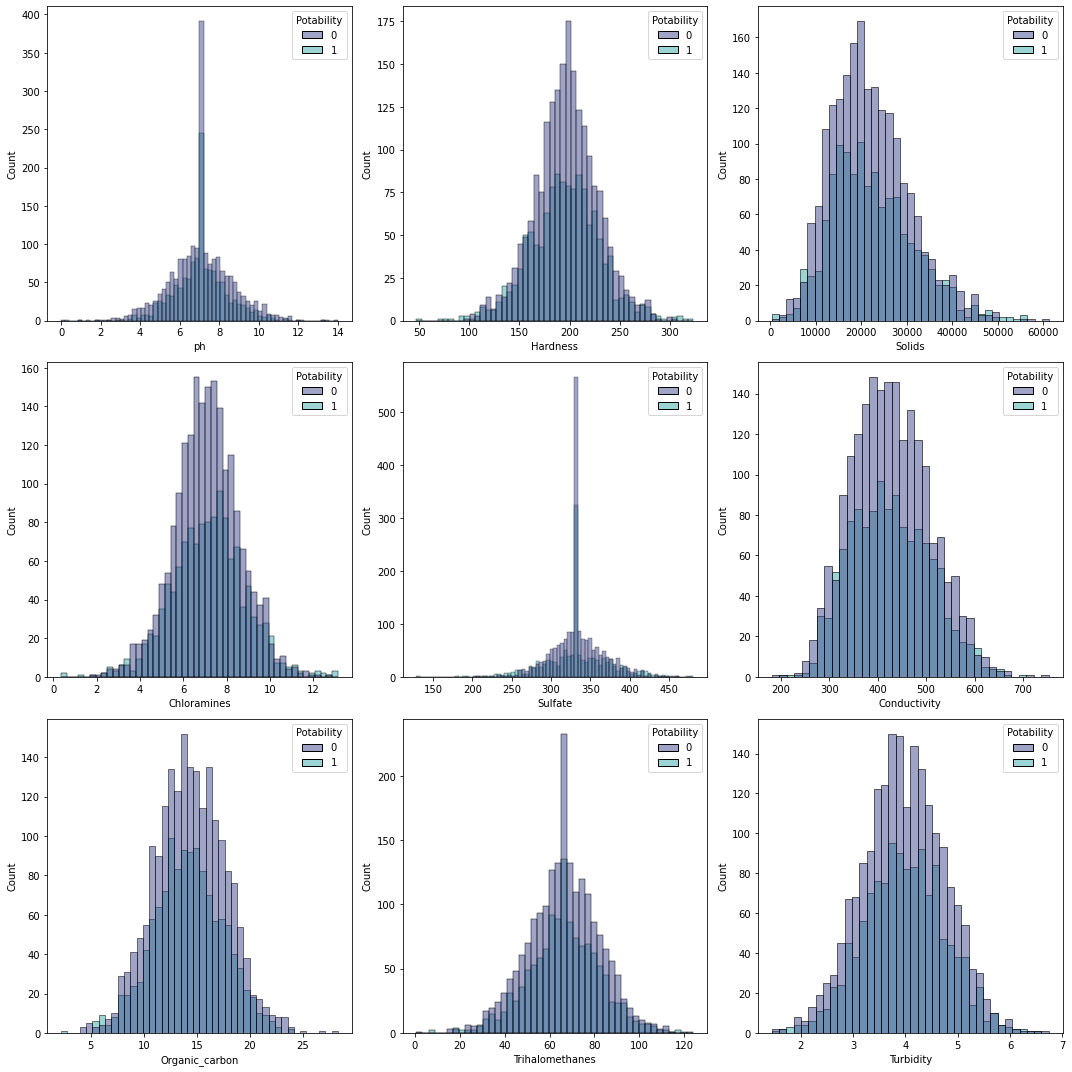

In [ ]:
fig, axs = plt.subplots(3,3, figsize = (15,15),tight_layout = True)

sns.histplot(data = dfAguas, x = 'ph', palette = 'mako', hue = 'Potability',alpha = 0.5,ax = axs[0,0])
sns.histplot(data = dfAguas, x = 'Hardness', palette = 'mako', hue = 'Potability',alpha = 0.5,ax = axs[0,1])
sns.histplot(data = dfAguas, x = 'Solids', palette = 'mako', hue = 'Potability',alpha = 0.5,ax = axs[0,2])
sns.histplot(data = dfAguas, x = 'Chloramines', palette = 'mako', hue = 'Potability',alpha = 0.5,ax = axs[1,0])
sns.histplot(data = dfAguas, x = 'Sulfate', palette = 'mako', hue = 'Potability',alpha = 0.5,ax = axs[1,1])
sns.histplot(data = dfAguas, x = 'Conductivity', palette = 'mako', hue = 'Potability',alpha = 0.5,ax = axs[1,2])
sns.histplot(data = dfAguas, x = 'Organic_carbon', palette = 'mako', hue = 'Potability',alpha = 0.5,ax = axs[2,0])
sns.histplot(data = dfAguas, x = 'Trihalomethanes', palette = 'mako', hue = 'Potability',alpha = 0.5,ax = axs[2,1])
sns.histplot(data = dfAguas, x = 'Turbidity', palette = 'mako', hue = 'Potability',alpha = 0.5,ax = axs[2,2])

figsize = (6.4,4.8)

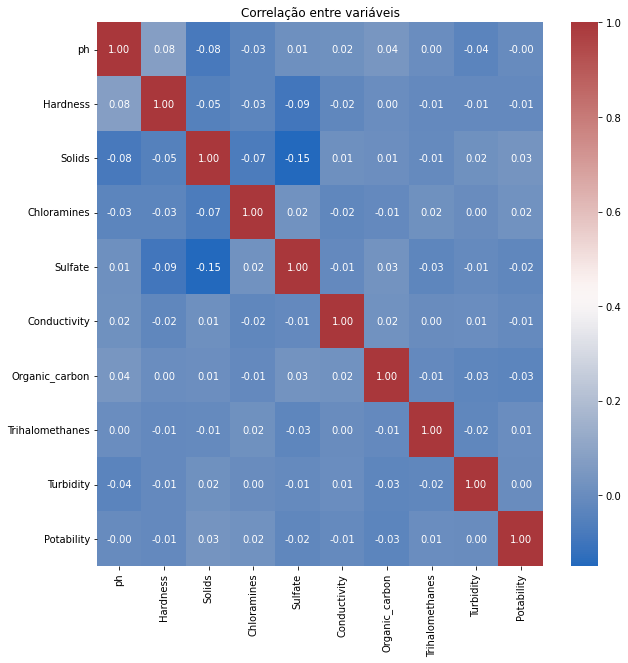

In [ ]:
## Nenhum valor de correlação sugere que dá pra remover algum atributo da classificação a fim de reduzir dimensionalidade
plt.subplots(figsize = (10,10))
sns.heatmap(
    dfAguas.corr(),
    annot = True,
    fmt = '.2f',
    cmap='vlag')

plt.title('Correlação entre variáveis')
plt.show()
figsize = (6.4,4.8)

#Modelagem

In [ ]:
#Normalizando os dados
dfNorm = dfAguas.copy()
dfNorm['ph'] = (dfNorm['ph'] - dfNorm['ph'].mean())/ dfNorm['ph'].std()
dfNorm['Hardness'] = (dfNorm['Hardness'] - dfNorm['Hardness'].mean())/ dfNorm['Hardness'].std()
dfNorm['Solids'] = (dfNorm['Solids'] - dfNorm['Solids'].mean())/ dfNorm['Solids'].std()
dfNorm['Chloramines'] = (dfNorm['Chloramines'] - dfNorm['Chloramines'].mean())/ dfNorm['Chloramines'].std()
dfNorm['Sulfate'] = (dfNorm['Sulfate'] - dfNorm['Sulfate'].mean())/ dfNorm['Sulfate'].std()
dfNorm['Conductivity'] = (dfNorm['Conductivity'] - dfNorm['Conductivity'].mean())/ dfNorm['Conductivity'].std()
dfNorm['Organic_carbon'] = (dfNorm['Organic_carbon'] - dfNorm['Organic_carbon'].mean())/ dfNorm['Organic_carbon'].std()
dfNorm['Trihalomethanes'] = (dfNorm['Trihalomethanes'] - dfNorm['Trihalomethanes'].mean())/ dfNorm['Trihalomethanes'].std()
dfNorm['Turbidity'] = (dfNorm['Turbidity'] - dfNorm['Turbidity'].mean())/ dfNorm['Turbidity'].std()

In [ ]:
dfNorm.sample(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
2637,1.075208,0.663118,-0.822800,-0.605292,0.900281,-0.115495,-1.611303,0.393964,1.513811,0
1977,0.069370,0.301870,0.431183,0.424772,-0.340979,0.730591,0.389916,-1.094202,0.994616,1
1451,2.229564,1.377817,-0.390690,1.049913,-0.014797,-1.515848,-0.202234,0.553103,1.615648,0
1008,1.101270,-0.352700,-0.995637,-0.379299,0.413526,1.667335,-0.092687,0.337754,-1.369281,0
2508,1.898270,2.485175,-1.030487,-0.134993,-0.393604,0.747708,0.020063,1.166225,-0.339437,0
1826,-0.425032,2.414167,-1.528924,0.365965,-1.699066,-0.517475,0.542094,-0.761132,-0.322095,0
650,-0.357403,0.267601,-0.961296,-2.112729,-0.014797,-1.215452,0.405828,-0.923091,0.295392,0
2641,-0.025470,0.969669,-0.390129,-0.768796,-0.014797,0.607376,-0.185095,-0.755551,0.199984,0
389,-1.085876,0.457100,0.609856,-0.828648,0.194098,-0.843325,0.708676,0.013634,-0.246712,1
1653,-0.289916,-0.137705,-0.779808,-0.922638,-0.014797,0.554810,0.348628,-0.626196,-0.175558,0


In [ ]:
X= dfNorm[::-1]
y = dfNorm['Potability']

In [ ]:
X_trainKNN, X_testKNN, y_trainKNN, y_testKNN = train_test_split(X, y, test_size = 0.25, random_state = 2)
X_trainSVM, X_testSVM, y_trainSVM, y_testSVM = train_test_split(X, y, test_size = 0.25, random_state = 2)
X_trainDT, X_testDT, y_trainDT, y_testDT = train_test_split(X, y, test_size = 0.25, random_state = 2)

##KNN Calibragem

In [ ]:
acs = []
pcs = []
for i in range(1,15):
  KNN = KNeighborsClassifier(n_neighbors=i)
  KNN.fit(X_trainKNN, y_trainKNN)
  resKNN = KNN.predict(X_testKNN)
  pcs.append(precision_score(y_testKNN,resKNN))
  acs.append(accuracy_score(y_testKNN,resKNN))

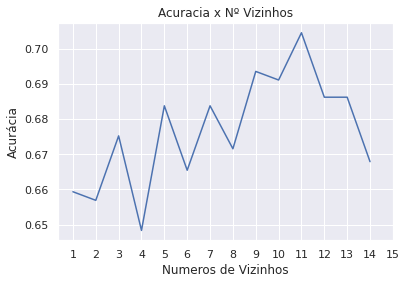

In [ ]:
sns.set()
plt.plot(range(1,15),acs)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
plt.title('Acuracia x Nº Vizinhos')
plt.xlabel('Numeros de Vizinhos')
plt.ylabel('Acurácia')
plt.show()

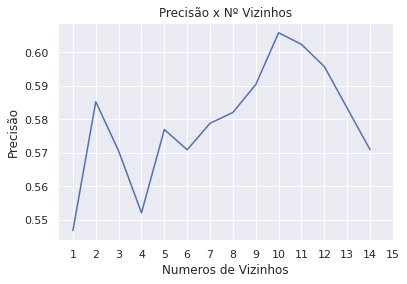

In [ ]:
sns.set()
plt.plot(range(1,15),pcs)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
plt.title('Precisão x Nº Vizinhos')
plt.xlabel('Numeros de Vizinhos')
plt.ylabel('Precisão')
plt.show()

##KNN

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=11)
KNN.fit(X_trainKNN, y_trainKNN)
resKNN = KNN.predict(X_testKNN)

##SVM

In [ ]:
SVM = SVC(probability=True)
SVM.fit(X_trainSVM, y_trainSVM)
resSVM = SVM.predict(X_testSVM)

##Arvore de decisão

In [ ]:
dctree = DecisionTreeClassifier()
dctree.fit(X_trainDT, y_trainDT)
resDT = dctree.predict(X_testDT)

#Resultados experimentais e análise

##KNN

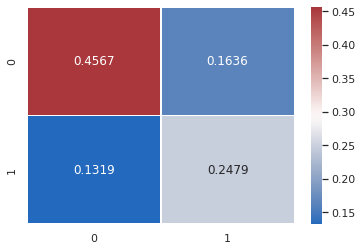

In [ ]:
matriz_conf = confusion_matrix(y_testKNN, resKNN)
sns.heatmap(matriz_conf/len(X_testKNN), annot=True,linewidths = 0.8, fmt = ".4f", cmap='vlag')

In [ ]:
print(classification_report(y_testKNN,resKNN))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76       508
           1       0.60      0.65      0.63       311

    accuracy                           0.70       819
   macro avg       0.69      0.69      0.69       819
weighted avg       0.71      0.70      0.71       819



##SVM

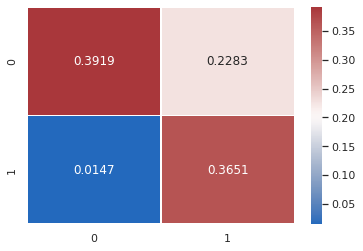

In [ ]:
matriz_conf = confusion_matrix(y_testSVM, resSVM)
sns.heatmap(matriz_conf/len(X_testSVM), annot=True,linewidths = 0.8, fmt = ".4f", cmap='vlag')

In [ ]:
print(classification_report(y_testSVM,resSVM))

              precision    recall  f1-score   support

           0       0.96      0.63      0.76       508
           1       0.62      0.96      0.75       311

    accuracy                           0.76       819
   macro avg       0.79      0.80      0.76       819
weighted avg       0.83      0.76      0.76       819



##Árvore de Decisão

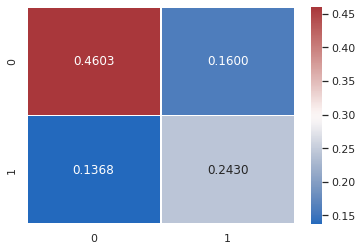

In [ ]:
matriz_conf = confusion_matrix(y_testDT, resDT)
sns.heatmap(matriz_conf/len(X_testDT), annot=True,linewidths = 0.8, fmt = ".4f", cmap='vlag')

In [ ]:
print(classification_report(y_testDT,resDT))

              precision    recall  f1-score   support

           0       0.77      0.74      0.76       508
           1       0.60      0.64      0.62       311

    accuracy                           0.70       819
   macro avg       0.69      0.69      0.69       819
weighted avg       0.71      0.70      0.70       819



# Avaliação

##KNN

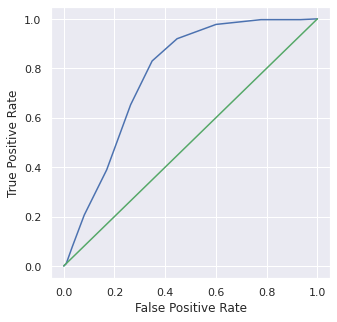

In [ ]:
fpr, tpr, _ = roc_curve(y_testKNN, KNN.predict_proba(X_testKNN)[:, 1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
roc_display.figure_.set_size_inches(5,5)
plt.plot([0, 1], [0, 1], color = 'g')

In [ ]:
print(roc_auc_score(y_testKNN, resKNN))

0.694476795706003


##SVM

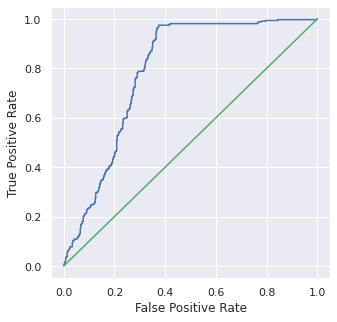

In [ ]:
fpr, tpr, _ = roc_curve(y_testSVM, SVM.predict_proba(X_testSVM)[:, 1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
roc_display.figure_.set_size_inches(5,5)
plt.plot([0, 1], [0, 1], color = 'g')

In [ ]:
print(roc_auc_score(y_testSVM, resSVM))

0.796652277388156


##Árvore de Decisão

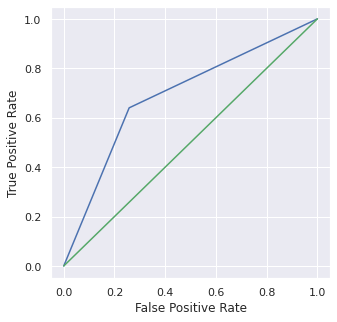

In [ ]:
fpr, tpr, _ = roc_curve(y_testDT, dctree.predict_proba(X_testDT)[:, 1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
roc_display.figure_.set_size_inches(5,5)
plt.plot([0, 1], [0, 1], color = 'g')

In [ ]:
print(roc_auc_score(y_testDT, resDT))

0.6909986834443123
